In [15]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import ast
import os
from data_preprocessing import *
from image_features_extractor import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import math
import time
import joblib
from landmarks_detector import *
import dlib

### Welcome to Playground of Landmarks Detector, in this notebook we will find methods of training, and testing the produced model using CFSS Algorithm

### Show example from training images

In [9]:
df = pd.read_csv('combined2/train.csv')
df.head()

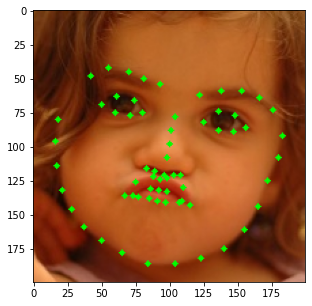

In [43]:
imgname = '1002681492_1.jpg'
landmarks= ast.literal_eval(df.loc[df['images'] == imgname].iloc[0]['landmarks'])
img = cv2.imread('combined2/trainset/'+imgname)
for i in range(0,68):
  cv2.circle(img, (landmarks[i][0],landmarks[i][1]), 2, (0, 255, 0), -1)


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#show image with matplotlib and increase figure size
fig = plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()


### Trying Various Training settings

In [ ]:
featuresUsed = [FeatureType.HOG, FeatureType.HOG, FeatureType.SIFT]
L = 3
alphas = [10000,3000,40000]

In [ ]:
detector = LandmarksDetector()
regressors, scalarmodels, pca_models, x_bar_initial = detector.train('combined2/train.csv', 'combined2/trainset/', featuresUsed=featuresUsed, L=L, alphas=alphas)

detector.calculateTestAccuracy('lfpw/croppedlfpw_test.csv','lfpw/croppedlfpw/testset/', x_bar_initial, regressors, featuresUsed, pca_models, scalarmodels)
detector.calculateTestAccuracy('300w/cropped300w_test.csv','300w/cropped300w/testset/', x_bar_initial, regressors, featuresUsed, pca_models, scalarmodels)
detector.calculateTestAccuracy('helen/croppedhelen_test.csv','helen/croppedhelen/testset/', x_bar_initial, regressors, featuresUsed, pca_models, scalarmodels)
detector.calculateTestAccuracy('ibug_test/croppedibug_test.csv','ibug_test/testset/', x_bar_initial, regressors, featuresUsed, pca_models, scalarmodels)

Iteration 1

Iteration 1 Error after sampling: 0.3750703748258848

K:  1
Feature Extraction...
HOG
Training regressor...
Alpha:  10000
Error after iteration l= 1 , regressor k= 1 :  0.2896039327247731
K:  2
Feature Extraction...
HOG
Training regressor...
Alpha:  10000
Error after iteration l= 1 , regressor k= 2 :  0.24676964584543162
K:  3
Feature Extraction...
HOG
Training regressor...
Alpha:  10000
Error after iteration l= 1 , regressor k= 3 :  0.2213447726241388
Updating distributions...
Iteration 2

Iteration 2 Error after sampling: 0.18079189800442874

K:  1
Feature Extraction...
HOG
Training regressor...
Alpha:  3000
Error after iteration l= 2 , regressor k= 1 :  0.1443048124113655
K:  2
Feature Extraction...
HOG
Training regressor...
Alpha:  3000
Error after iteration l= 2 , regressor k= 2 :  0.12984304820618575
K:  3
Feature Extraction...
HOG
Training regressor...
Alpha:  3000
Error after iteration l= 2 , regressor k= 3 :  0.12226133867737361
Updating distributions...
Iteration

### Testing final model

##### Read Image

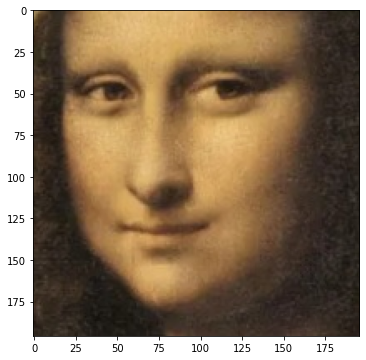

In [39]:
image = cv2.imread("test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(6, 6))
plt.imshow(image)

##### Choose bounding box of face

In [40]:
face = (0, 0, image.shape[0], image.shape[1])

##### Using our Landmarks Detector

In [41]:
landmarksDetector = LandmarksDetector(isPredictor=True, modelspath='finalmodel/')

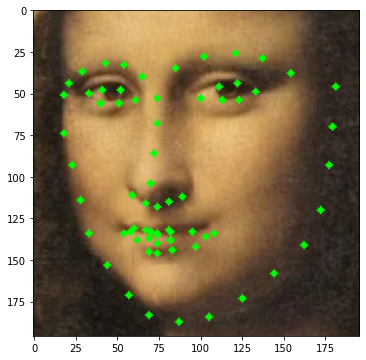

In [42]:
landmarks = landmarksDetector.predict(image, face)
for landmark in landmarks:
    cv2.circle(image, (landmark[0], landmark[1]), 2, (0, 255, 0), -1)

fig = plt.figure(figsize=(6, 6))
plt.imshow(image)